In [3]:
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
import pandas as pd 
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.animation import FuncAnimation
import matplotlib as mpl

# Importing the data

In [9]:
#Importing the data
data_path = '../calo_calibration/run_58/data.csv'
data = pd.read_csv(data_path)

# Drawing event by event

In [5]:

PST = {'111': 'Asic0_CH22',
        '112': "Asic0_CH13",
        '113': 'Asic0_CH12',
        '221': 'Asic0_CH16',
        '222': 'Asic0_CH17',
        '223': 'Asic0_CH18',
        '131': 'Asic0_CH21',
        '132': 'Asic0_CH14',
        '133': 'Asic0_CH15',
        '241': 'Asic0_CH19',
        '242': 'Asic0_CH0', 
        '243': 'Asic0_CH1',
        '151': 'Asic0_CH20',
        '152': 'Asic0_CH3',
        '153': 'Asic0_CH2',
        '261': 'Asic0_CH6',
        '262': 'Asic0_CH5',
        '263': 'Asic0_CH4',
        '171': 'Asic0_CH23',
        '172': 'Asic0_CH11',
        '173': 'Asic0_CH10',
        '281': 'Asic0_CH9',
        '282': 'Asic0_CH8',
        '283': 'Asic0_CH7'}

CALOG = {   '16': 'Asic2_CH2',
            '13': 'Asic2_CH3',
            '11': 'Asic2_CH4',
            '26': 'Asic2_CH5',
            '23': 'Asic2_CH6',
            '21': 'Asic2_CH7',
            '36': 'Asic2_CH8',
            '33': 'Asic2_CH9',
            '31': 'Asic2_CH10',
            '46': 'Asic2_CH11',
            '43': 'Asic2_CH12',
            '41': 'Asic2_CH13',
            '56': 'Asic2_CH14',
            '53': 'Asic2_CH15',
            '51': 'Asic2_CH16',
            '66': 'Asic2_CH17',
            '63': 'Asic2_CH18',
            '61': 'Asic2_CH19',
            '76': 'Asic2_CH20',
            '73': 'Asic2_CH21',
            '71': 'Asic2_CH22',
            '86': 'Asic2_CH23',
            '83': 'Asic2_CH24',
            '81': 'Asic2_CH25'}
POST = "_HG"

In [6]:
#1 = 3x3
#2 = 3x3
#3 = 1x1
#4 = 1x1
def draw_zire(triggerCount, data, MIN=5000, MAX=2**14, log=False):
    #define Matplotlib figure and axis
    event = data.iloc[triggerCount]
    colors = ['#000052','#0c44ac','#faf0ca','#ed0101','#970005'] 

    cm = LinearSegmentedColormap.from_list('custom', colors,N=100)
    cm.set_bad(color='white')
    if log:
        MAX = np.log(MAX)
        MIN = np.log(MIN)
        event = np.log(event)


    fig, ax = plt.subplots()
    ax.set_xlim(0, 100)
    ax.set_ylim(20, 90)
    fig.set_size_inches(10, 7)

    linewidth = 0.5
    edgec = 'black'

    #==============LEFT IMAGE==================================
    ax.add_patch(Rectangle((10, 80), 10, 5, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['111']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((20, 80), 10, 5, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['112']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((30, 80), 10, 5, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['113']+POST]  -MIN)/(MAX-MIN)*100))))

    ax.add_patch(Rectangle((10, 70), 10, 5, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['131']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((20, 70), 10, 5, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['132']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((30, 70), 10, 5, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['133']+POST]  -MIN)/(MAX-MIN)*100))))

    ax.add_patch(Rectangle((10, 60), 10, 5, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['151']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((20, 60), 10, 5, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['152']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((30, 60), 10, 5, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['153']+POST]  -MIN)/(MAX-MIN)*100))))

    ax.add_patch(Rectangle((10, 50), 10, 5, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['171']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((20, 50), 10, 5, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['172']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((30, 50), 10, 5, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['173']+POST]  -MIN)/(MAX-MIN)*100))))

    ax.add_patch(Rectangle((10, 30), 7.5, 5,    edgecolor=edgec, lw=linewidth))
    ax.add_patch(Rectangle((17.5, 30), 7.5, 5,  edgecolor=edgec, lw=linewidth))
    ax.add_patch(Rectangle((25, 30), 7.5, 5,    edgecolor=edgec, lw=linewidth))
    ax.add_patch(Rectangle((32.5, 30), 7.5, 5,  edgecolor=edgec, lw=linewidth))

    ax.add_patch(Rectangle((5,  45), 5, 40,     edgecolor=edgec, lw=linewidth))
    ax.add_patch(Rectangle((40, 45), 5, 40,     edgecolor=edgec, lw=linewidth))
    ax.add_patch(Rectangle((5, 25), 40, 5,      edgecolor=edgec, lw=linewidth))

    #==============RIGHT IMAGE==================================
    ax.add_patch(Rectangle((60, 75), 10, 5, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['221']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((70, 75), 10, 5, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['222']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((80, 75), 10, 5, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['223']+POST]  -MIN)/(MAX-MIN)*100))))

    ax.add_patch(Rectangle((60, 65), 10, 5, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['241']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((70, 65), 10, 5, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['242']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((80, 65), 10, 5, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['243']+POST]  -MIN)/(MAX-MIN)*100))))

    ax.add_patch(Rectangle((60, 55), 10, 5, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['261']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((70, 55), 10, 5, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['262']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((80, 55), 10, 5, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['263']+POST]  -MIN)/(MAX-MIN)*100))))

    ax.add_patch(Rectangle((60, 45), 10, 5, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['281']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((70, 45), 10, 5, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['282']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((80, 45), 10, 5, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['283']+POST]  -MIN)/(MAX-MIN)*100))))

    ax.add_patch(Rectangle((50+17.5, 30), 7.5, 5,   edgecolor=edgec, lw=linewidth))
    ax.add_patch(Rectangle((50+25, 30), 7.5, 5,     edgecolor=edgec, lw=linewidth))

    ax.add_patch(Rectangle((55,  45), 5, 40,    edgecolor=edgec, lw = linewidth))
    ax.add_patch(Rectangle((90, 45), 5, 40,     edgecolor=edgec, lw = linewidth))
    ax.add_patch(Rectangle((55, 25), 40, 5,     edgecolor=edgec, lw = linewidth))
    gradient = np.linspace(0, 1, 100)
    gradient = np.vstack((gradient, gradient))
    plt.imshow(gradient, aspect='auto', cmap=cm, extent=[0, 100, 20, 21])

    plt.text(15, 87, '1')
    plt.text(25, 87, '2')
    plt.text(35, 87, '3')

    plt.text(65, 87, '1')
    plt.text(75, 87, '2')
    plt.text(85, 87, '3')

    plt.text(3, 82, '1')
    plt.text(3, 72, '3')
    plt.text(3, 62, '5')
    plt.text(3, 52, '7')

    plt.text(53, 77, '1')
    plt.text(53, 67, '3')
    plt.text(53, 57, '5')
    plt.text(53, 47, '7')

    plt.text(0, 23,  f'{MIN}')
    plt.text(96, 23, f'{MAX}')
    plt.axis('off')
    plt.title(f'Trigger Count {triggerCount}')
    plt.show()



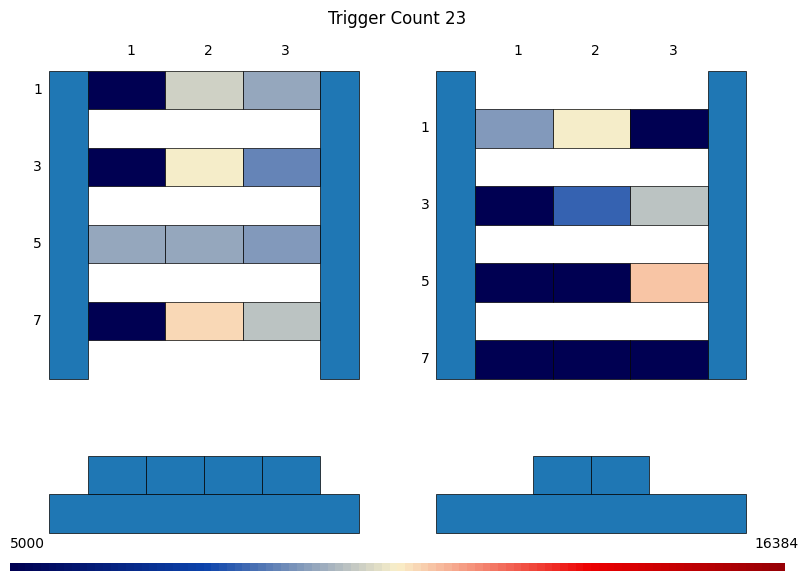

In [93]:
draw_zire(23, data)

In [7]:
data

,TIMESTAMP,TRIGGERID,TRIGGER COUNTS,VALID,FLAG,Asic0_CH0_HG,Asic0_CH0_LG,Asic0_CH1_HG,Asic0_CH1_LG,Asic0_CH2_HG,...,Asic3_CH27_HG,Asic3_CH27_LG,Asic3_CH28_HG,Asic3_CH28_LG,Asic3_CH29_HG,Asic3_CH29_LG,Asic3_CH30_HG,Asic3_CH30_LG,Asic3_CH31_HG,Asic3_CH31_LG
0,52841429319286787,0,0,158000144,158376978,9675,9239,9675,9242,9669,...,2148,2113,2147,2113,2145,2112,0,0,0,0
1,52841429319286788,0,0,148661197,148906953,9114,9165,9137,9170,9158,...,2150,2111,2148,2111,2146,2111,0,0,0,0
2,52841429319286789,0,0,144564883,144302722,8809,8832,8816,8834,8824,...,1907,1753,1988,1802,2053,1849,0,0,0,0
3,52841429319286834,0,0,156869464,157033307,9593,9055,9601,9058,9606,...,2114,2105,2123,2110,2131,2113,0,0,0,0
4,52841429319286835,0,0,144204411,143925865,8785,8808,8788,8807,8793,...,1631,1515,1698,1565,1767,1615,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,52841429319288419,0,0,412953160,391357871,9561,10070,9524,10647,7849,...,4867,4811,4848,4835,4849,4858,0,0,0,0
1566,52841429319288420,0,0,413035084,397632942,7608,10074,9754,10656,7308,...,4872,4812,4849,4832,4856,4856,0,0,0,0
1567,52841429319288421,0,0,390667578,356471764,8264,6752,5507,5030,7143,...,4871,4814,4852,4831,4850,4858,0,0,0,0
1568,52841429319288422,0,0,414870091,391456181,8104,10071,10287,10656,7367,...,4863,4811,4848,4827,4855,4859,0,0,0,0


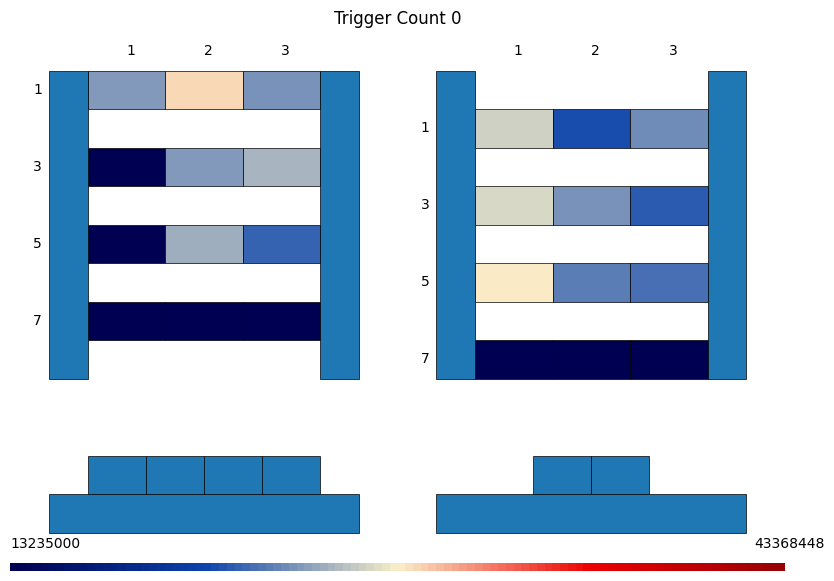

In [40]:
sum = data.sum().to_frame().transpose()
draw_zire(0, sum, MIN=(5000*2647), MAX=(2**14 * 2647))


# Event by event 2

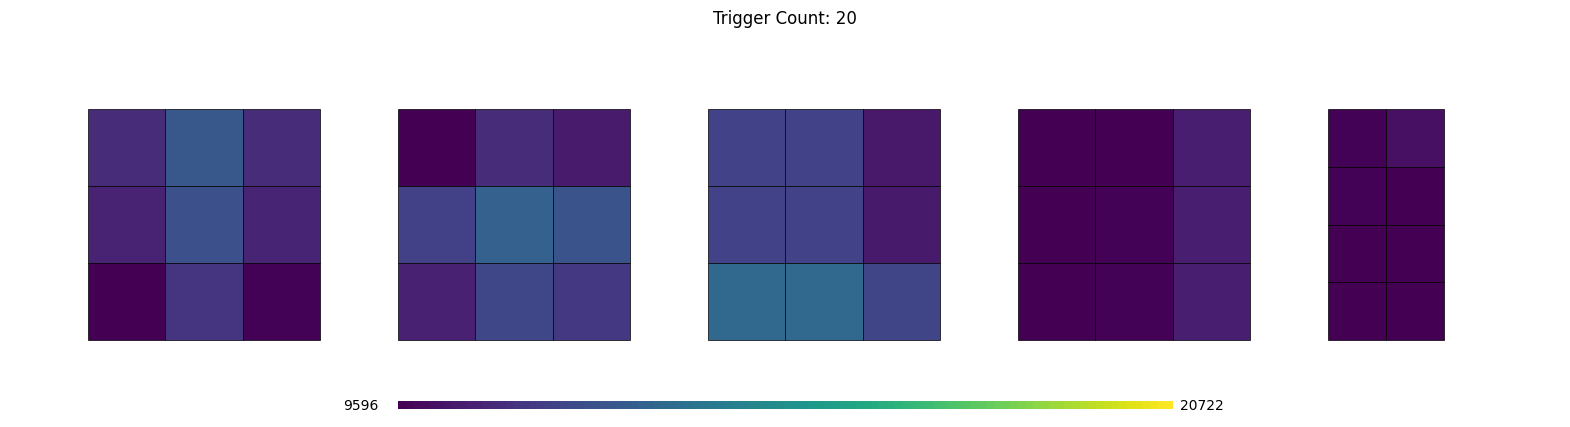

In [94]:
def draw_zire_2(triggerCount, data, MIN=10000, MAX=2**14, log=False):
    #define Matplotlib figure and axis
    event = data.iloc[triggerCount]
    MAX = np.max([event[PST[i]+POST] for i in PST]) *2
    MIN = np.min([event[PST[i]+POST] for i in PST]) *2
    colors = ['#000052','#0c44ac','#faf0ca','#ed0101','#970005'] 
    #colors = ['#000000', '#ffffff'] 

    #cm = LinearSegmentedColormap.from_list('custom', colors,N=100)
    cm = mpl.colormaps['viridis']
    cm.set_bad(color='white')
    if log:
        MAX = np.log(MAX)
        MIN = np.log(MIN)
        event = np.log(event)

    
    fig, ax = plt.subplots()
    ax.set_xlim(0, 200)
    ax.set_ylim(0, 50)
    fig.set_size_inches(20, 5)

    linewidth = 0.5
    edgec = 'black'
    
    # Fisrt box
    ax.add_patch(Rectangle((10, 30), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['111']+POST] + event[PST['221']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((20, 30), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['112']+POST] + event[PST['221']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((30, 30), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['113']+POST] + event[PST['221']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((10, 20), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['111']+POST] + event[PST['222']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((20, 20), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['112']+POST] + event[PST['222']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((30, 20), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['113']+POST] + event[PST['222']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((10, 10), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['111']+POST] + event[PST['223']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((20, 10), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['112']+POST] + event[PST['223']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((30, 10), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['113']+POST] + event[PST['223']+POST]  -MIN)/(MAX-MIN)*100))))

    ax.add_patch(Rectangle((40+10, 30), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['131']+POST] + event[PST['241']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((40+20, 30), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['132']+POST] + event[PST['241']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((40+30, 30), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['133']+POST] + event[PST['241']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((40+10, 20), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['131']+POST] + event[PST['242']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((40+20, 20), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['132']+POST] + event[PST['242']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((40+30, 20), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['133']+POST] + event[PST['242']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((40+10, 10), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['131']+POST] + event[PST['243']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((40+20, 10), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['132']+POST] + event[PST['243']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((40+30, 10), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['133']+POST] + event[PST['243']+POST]  -MIN)/(MAX-MIN)*100))))

    ax.add_patch(Rectangle((80+10, 30), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['151']+POST] + event[PST['261']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((80+20, 30), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['152']+POST] + event[PST['261']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((80+30, 30), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['153']+POST] + event[PST['261']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((80+10, 20), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['151']+POST] + event[PST['262']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((80+20, 20), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['152']+POST] + event[PST['262']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((80+30, 20), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['153']+POST] + event[PST['262']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((80+10, 10), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['151']+POST] + event[PST['263']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((80+20, 10), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['152']+POST] + event[PST['263']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((80+30, 10), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['153']+POST] + event[PST['263']+POST]  -MIN)/(MAX-MIN)*100))))

    ax.add_patch(Rectangle((120+10, 30), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['171']+POST] + event[PST['281']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((120+20, 30), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['172']+POST] + event[PST['281']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((120+30, 30), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['173']+POST] + event[PST['281']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((120+10, 20), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['171']+POST] + event[PST['282']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((120+20, 20), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['172']+POST] + event[PST['282']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((120+30, 20), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['173']+POST] + event[PST['282']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((120+10, 10), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['171']+POST] + event[PST['283']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((120+20, 10), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['172']+POST] + event[PST['283']+POST]  -MIN)/(MAX-MIN)*100))))
    ax.add_patch(Rectangle((120+30, 10), 10, 10, edgecolor=edgec, lw=linewidth, facecolor=cm(int((event[PST['173']+POST] + event[PST['283']+POST]  -MIN)/(MAX-MIN)*100))))

    MIN2 = np.min([event[CALOG[i]+POST] for i in CALOG])
    MAX2 = np.max([event[CALOG[i]+POST] for i in CALOG]) + 1

    ax.add_patch(Rectangle((160+10,     32.5), 7.5, 7.5,                edgecolor=edgec, lw=linewidth, facecolor=cm(int(  (event[CALOG['16']+POST] - MIN2)/(MAX2-MIN2)*100  ))))
    ax.add_patch(Rectangle((160+17.5,   32.5), 7.5, 7.5,                edgecolor=edgec, lw=linewidth, facecolor=cm(int(  (event[CALOG['26']+POST] - MIN2)/(MAX2-MIN2)*100  ))))
    ax.add_patch(Rectangle((160+10,     32.5-7.5), 7.5, 7.5,            edgecolor=edgec, lw=linewidth, facecolor=cm(int(  (event[CALOG['36']+POST] - MIN2)/(MAX2-MIN2)*100  ))))
    ax.add_patch(Rectangle((160+17.5,   32.5-7.5), 7.5, 7.5,            edgecolor=edgec, lw=linewidth, facecolor=cm(int(  (event[CALOG['46']+POST] - MIN2)/(MAX2-MIN2)*100  ))))
    ax.add_patch(Rectangle((160+10,     32.5-7.5-7.5), 7.5, 7.5,        edgecolor=edgec, lw=linewidth, facecolor=cm(int(  (event[CALOG['56']+POST] - MIN2)/(MAX2-MIN2)*100  ))))
    ax.add_patch(Rectangle((160+17.5,   32.5-7.5-7.5), 7.5, 7.5,        edgecolor=edgec, lw=linewidth, facecolor=cm(int(  (event[CALOG['66']+POST] - MIN2)/(MAX2-MIN2)*100  ))))
    ax.add_patch(Rectangle((160+10,     32.5-7.5-7.5-7.5), 7.5, 7.5,    edgecolor=edgec, lw=linewidth, facecolor=cm(int(  (event[CALOG['76']+POST] - MIN2)/(MAX2-MIN2)*100  ))))
    ax.add_patch(Rectangle((160+17.5,   32.5-7.5-7.5-7.5), 7.5, 7.5,    edgecolor=edgec, lw=linewidth, facecolor=cm(int(  (event[CALOG['86']+POST] - MIN2)/(MAX2-MIN2)*100  ))))

    gradient = np.linspace(0, 1, 100)
    gradient = np.vstack((gradient, gradient))
    plt.imshow(gradient, aspect='auto', cmap='viridis', extent=[50, 150, 1, 2])



    plt.text(43, 1, f'{MIN}')
    plt.text(151, 1, f'{MAX}')
    plt.title(f'Trigger Count: {triggerCount}')
    plt.axis('off')
    plt.show()
draw_zire_2(20, data)


# Drawing histograms

In [6]:
data

,TIMESTAMP,TRIGGERID,TRIGGER COUNTS,VALID,FLAG,Asic0_CH0_HG,Asic0_CH0_LG,Asic0_CH1_HG,Asic0_CH1_LG,Asic0_CH2_HG,...,Asic3_CH27_HG,Asic3_CH27_LG,Asic3_CH28_HG,Asic3_CH28_LG,Asic3_CH29_HG,Asic3_CH29_LG,Asic3_CH30_HG,Asic3_CH30_LG,Asic3_CH31_HG,Asic3_CH31_LG
0,52841429321112247,0,0,79041269,78058318,4880,4892,4893,4888,4860,...,4868,4816,4846,4832,4854,4862,0,0,0,0
1,52841429319286793,0,0,80564962,79762227,4984,4885,4943,4872,4863,...,4844,4793,4828,4809,4833,4834,0,0,0,0
2,52841429319286794,0,0,79336181,79827790,4907,4903,4874,4894,4900,...,4867,4814,4851,4833,4856,4858,0,0,0,0
3,52841429319286795,0,0,80433909,78615375,4942,4893,4953,4894,4951,...,4873,4813,4848,4835,4851,4858,0,0,0,0
4,52841429319286799,0,0,79712994,81646405,5001,4891,4869,4869,4860,...,4839,4786,4823,4802,4830,4837,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840630,52841429324035135,0,0,79024885,81843028,4918,4892,5033,4897,4880,...,4866,4814,4851,4829,4859,4859,0,0,0,0
840631,52841429324035139,0,0,79434482,78549829,4870,4890,4966,4900,4848,...,4872,4815,4851,4835,4850,4860,0,0,0,0
840632,52841429324035144,0,0,78893758,76845845,4866,4853,4926,4838,4749,...,4807,4758,4792,4762,4796,4795,0,0,0,0
840633,52841429324035148,0,0,80286456,80450383,4808,4892,4882,4890,4897,...,4872,4815,4852,4832,4853,4858,0,0,0,0


array([[<Axes: title={'center': 'Asic2_CH2_HG'}>,
        <Axes: title={'center': 'Asic2_CH3_HG'}>,
        <Axes: title={'center': 'Asic2_CH4_HG'}>,
        <Axes: title={'center': 'Asic2_CH5_HG'}>,
        <Axes: title={'center': 'Asic2_CH6_HG'}>],
       [<Axes: title={'center': 'Asic2_CH7_HG'}>,
        <Axes: title={'center': 'Asic2_CH8_HG'}>,
        <Axes: title={'center': 'Asic2_CH9_HG'}>,
        <Axes: title={'center': 'Asic2_CH10_HG'}>,
        <Axes: title={'center': 'Asic2_CH11_HG'}>],
       [<Axes: title={'center': 'Asic2_CH12_HG'}>,
        <Axes: title={'center': 'Asic2_CH13_HG'}>,
        <Axes: title={'center': 'Asic2_CH14_HG'}>,
        <Axes: title={'center': 'Asic2_CH15_HG'}>,
        <Axes: title={'center': 'Asic2_CH16_HG'}>],
       [<Axes: title={'center': 'Asic2_CH17_HG'}>,
        <Axes: title={'center': 'Asic2_CH18_HG'}>,
        <Axes: title={'center': 'Asic2_CH19_HG'}>,
        <Axes: title={'center': 'Asic2_CH20_HG'}>,
        <Axes: title={'center': 'Asi

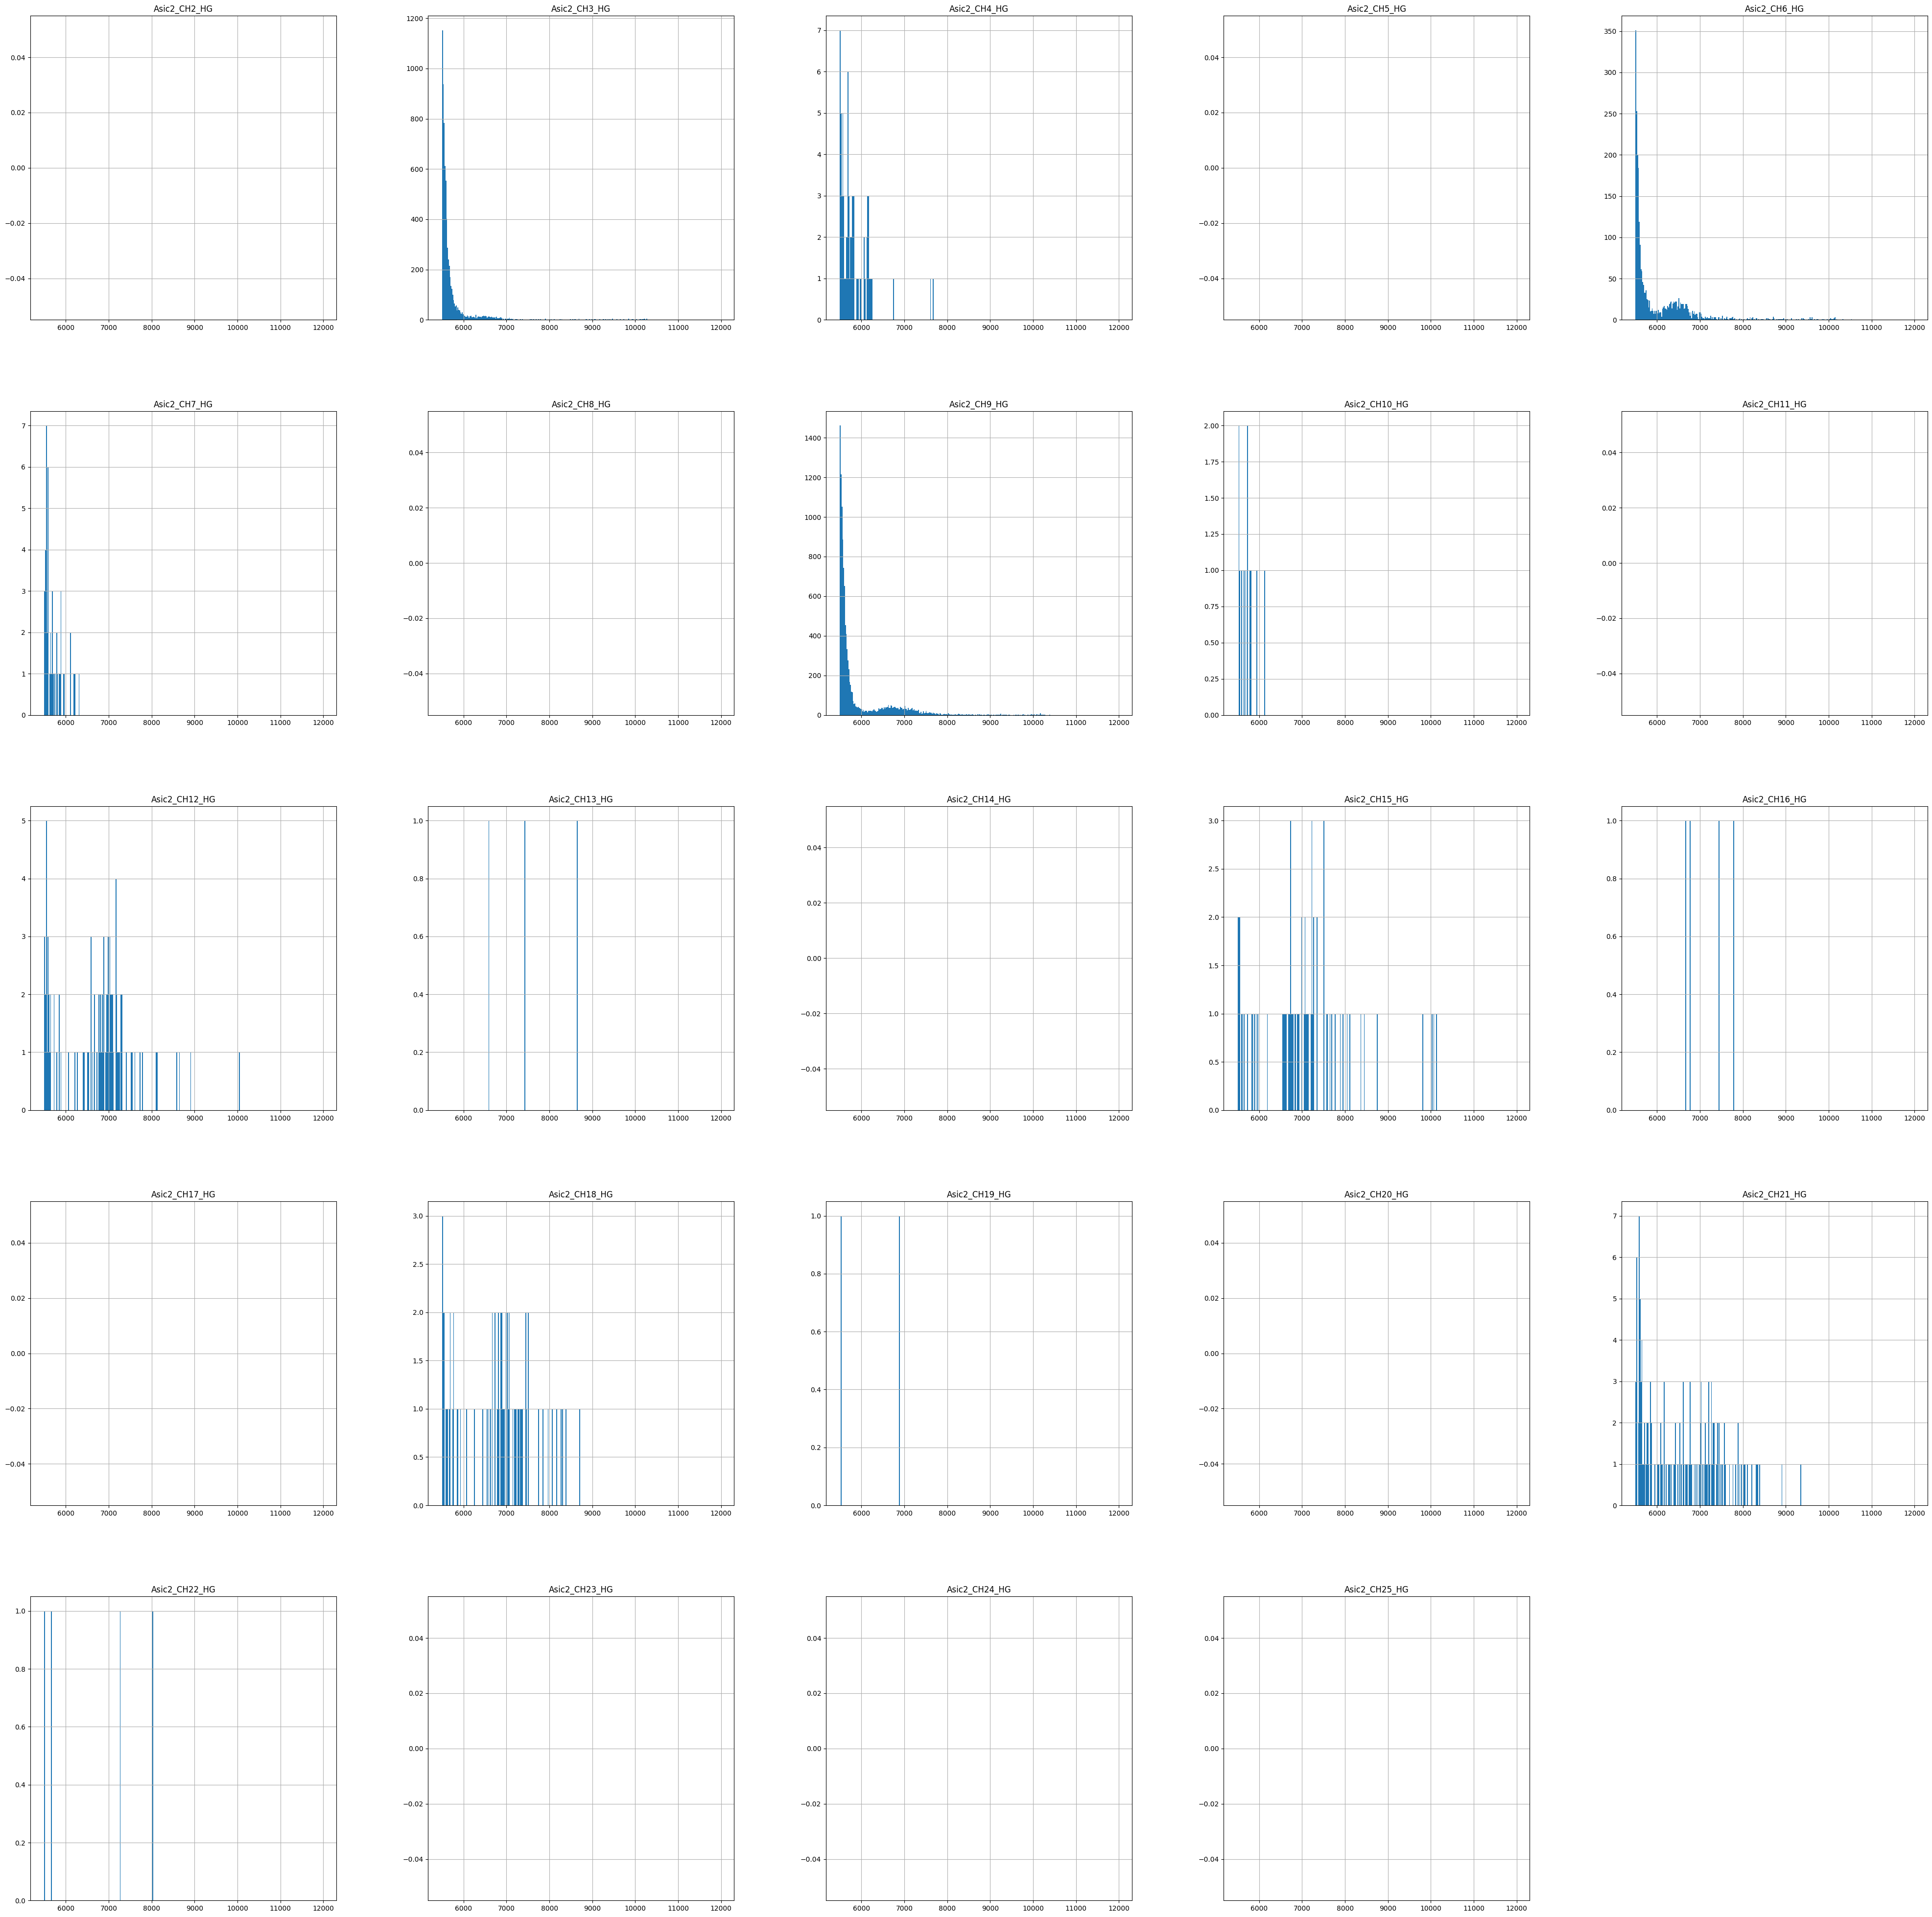

In [10]:

bins = [i for i in range(5500, 12000, 20)]
asics = [f'Asic2_CH{i}_HG' for i in range(2, 26)]
data[asics].hist(figsize=(50, 50), bins=bins)


array([[<Axes: title={'center': 'Asic2_CH2_LG'}>,
        <Axes: title={'center': 'Asic2_CH3_LG'}>,
        <Axes: title={'center': 'Asic2_CH4_LG'}>,
        <Axes: title={'center': 'Asic2_CH5_LG'}>,
        <Axes: title={'center': 'Asic2_CH6_LG'}>],
       [<Axes: title={'center': 'Asic2_CH7_LG'}>,
        <Axes: title={'center': 'Asic2_CH8_LG'}>,
        <Axes: title={'center': 'Asic2_CH9_LG'}>,
        <Axes: title={'center': 'Asic2_CH10_LG'}>,
        <Axes: title={'center': 'Asic2_CH11_LG'}>],
       [<Axes: title={'center': 'Asic2_CH12_LG'}>,
        <Axes: title={'center': 'Asic2_CH13_LG'}>,
        <Axes: title={'center': 'Asic2_CH14_LG'}>,
        <Axes: title={'center': 'Asic2_CH15_LG'}>,
        <Axes: title={'center': 'Asic2_CH16_LG'}>],
       [<Axes: title={'center': 'Asic2_CH17_LG'}>,
        <Axes: title={'center': 'Asic2_CH18_LG'}>,
        <Axes: title={'center': 'Asic2_CH19_LG'}>,
        <Axes: title={'center': 'Asic2_CH20_LG'}>,
        <Axes: title={'center': 'Asi

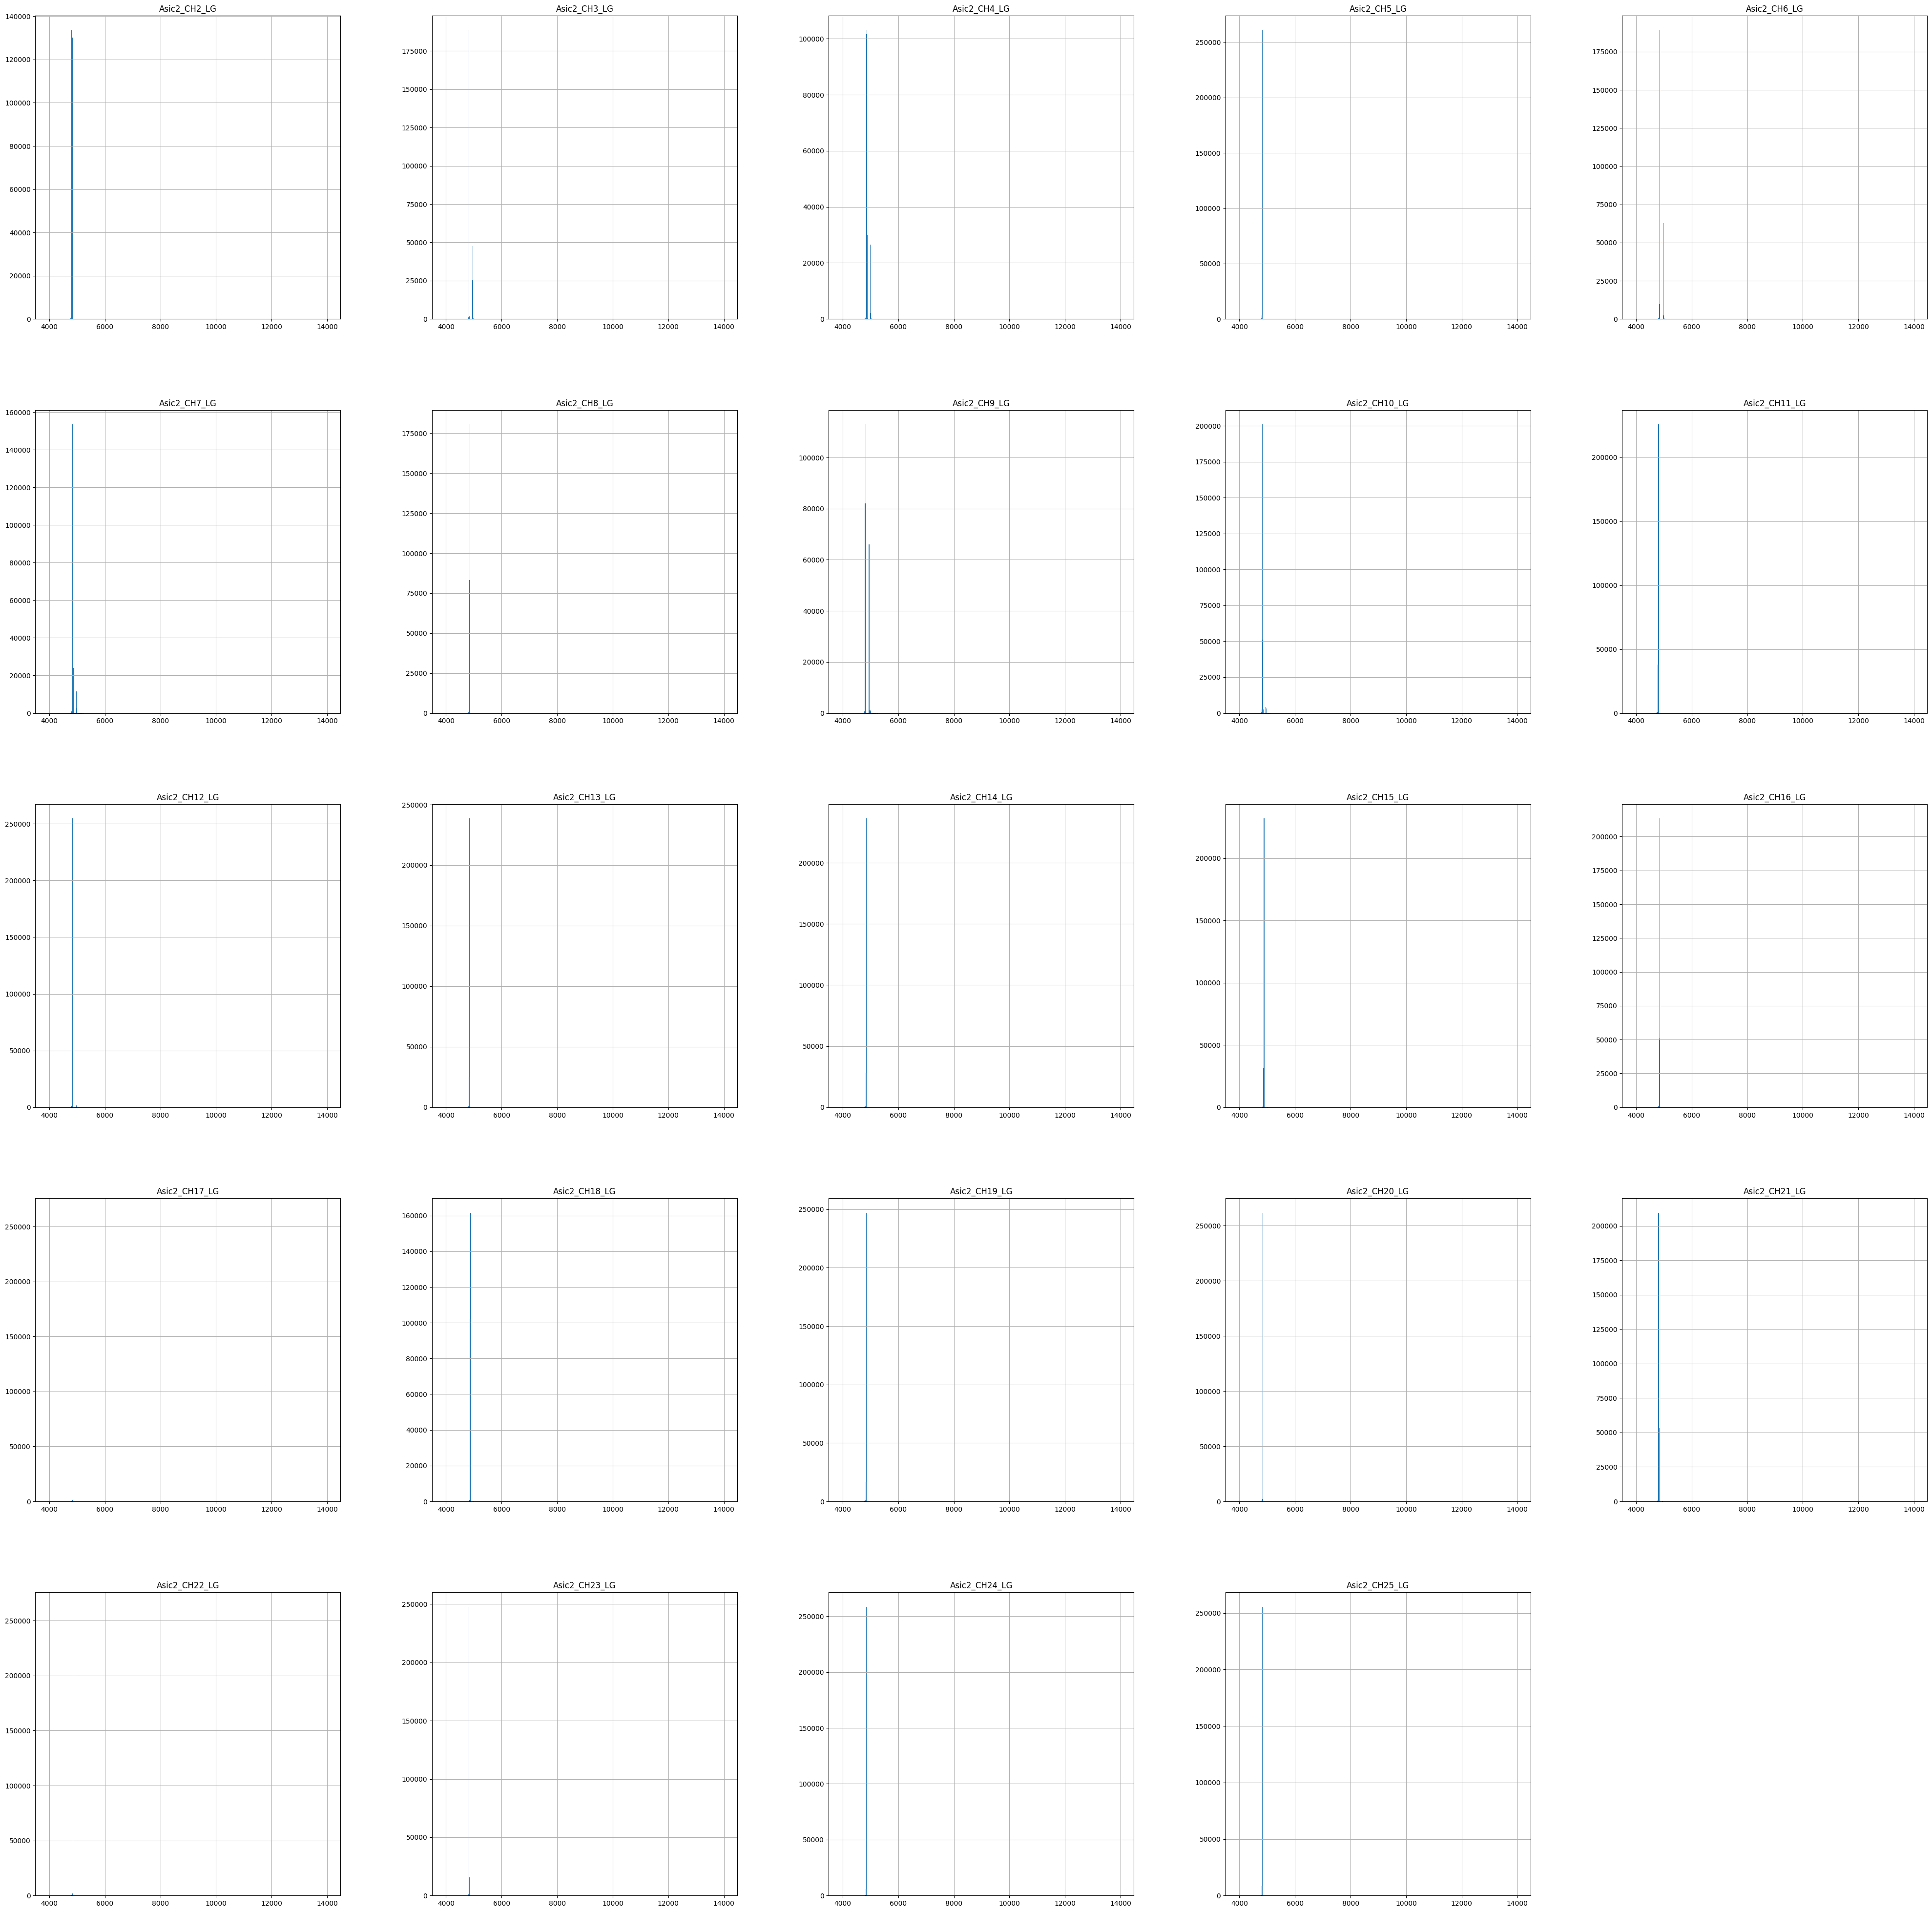

In [12]:

bins = [i for i in range(4000, 14000, 20)]
asics = [f'Asic2_CH{i}_LG' for i in range(2, 26)]
data[asics].hist(figsize=(50, 50), bins=bins)
